# #Importing Required Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE,RandomOverSampler,KMeansSMOTE
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [90]:
df=pd.read_csv('./data/hypothyroid.data')

In [91]:
df.head()

,hypothyroid,72,M,f,f.1,f.2,f.3,f.4,f.5,f.6,...,y.1,0.60,y.2,15,y.3,1.48,y.4,10,n,?
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,y,1.10,y,27,y,1.19,y,23,n,?


In [92]:
#defining column names by taking reference of hypothyroid.names
df.columns=['Target','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

In [93]:
df.head()

,Target,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,y,1.10,y,27,y,1.19,y,23,n,?


In [94]:
#moving target column at end of dataset
df = df[[col for col in df.columns if col != 'Target'] + ['Target']]

In [95]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Target
0,15,F,t,f,f,f,f,f,f,f,...,1.70,y,19,y,1.13,y,17,n,?,hypothyroid
1,24,M,f,f,f,f,f,f,f,f,...,0.20,y,4,y,1,y,0,n,?,hypothyroid
2,24,F,f,f,f,f,f,f,f,f,...,0.40,y,6,y,1.04,y,6,n,?,hypothyroid
3,77,M,f,f,f,f,f,f,f,f,...,1.20,y,57,y,1.28,y,44,n,?,hypothyroid
4,85,F,f,f,f,f,t,f,f,f,...,1.10,y,27,y,1.19,y,23,n,?,hypothyroid


## Exploratory Data Analysis

Checking Missing Values

In [96]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
Target                       0
dtype: int64

In [97]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'Target'],
      dtype='object')

In [98]:
df.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Target
count,3162,3162,3162,3162,3162,3162,3162,3162,3162,3162,...,3162,3162,3162,3162,3162,3162,3162,3162,3162,3162
unique,93,3,2,2,2,2,2,2,2,2,...,70,2,269,2,159,2,281,2,53,2
top,?,F,f,f,f,f,f,f,f,f,...,?,y,?,y,?,y,?,n,?,negative
freq,446,2182,2701,3107,3120,3058,2921,2919,3099,3063,...,695,2913,249,2914,248,2915,247,2902,2902,3012


## Insight
It can be see that from the data deascription that there are no missing values. But in the dataset the missing values are replaced with invalid values like '?'. So i will replace such values with 'nan' in data preprocessing step.

<Axes: xlabel='Target'>

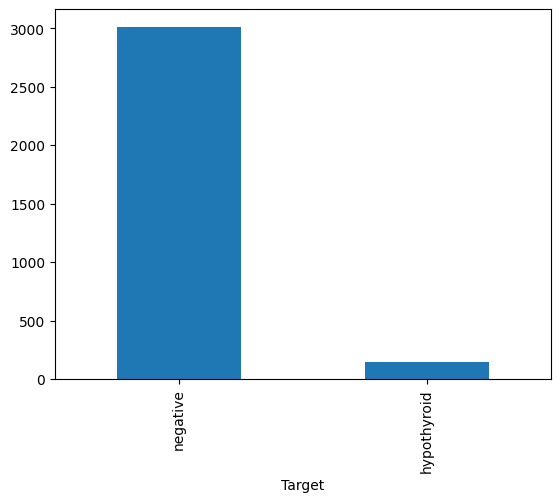

In [99]:
df['Target'].value_counts().plot(kind='bar')

## Insight
Heavily imbalanced dataset , definitly need resampling

<Axes: xlabel='sex'>

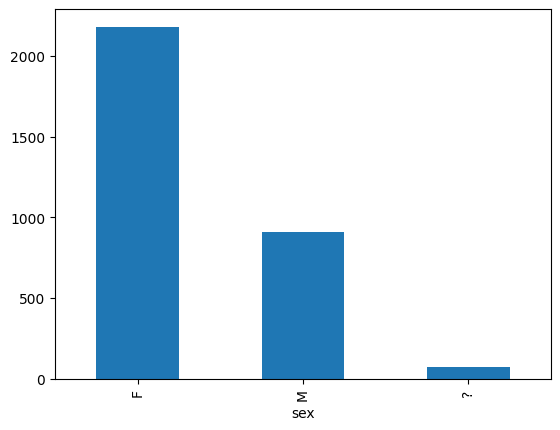

In [100]:
df['sex'].value_counts().plot(kind='bar')

Females are more affected by this disease , and we can also see that there is a '?' element present in place of null values.

<Axes: xlabel='pregnant'>

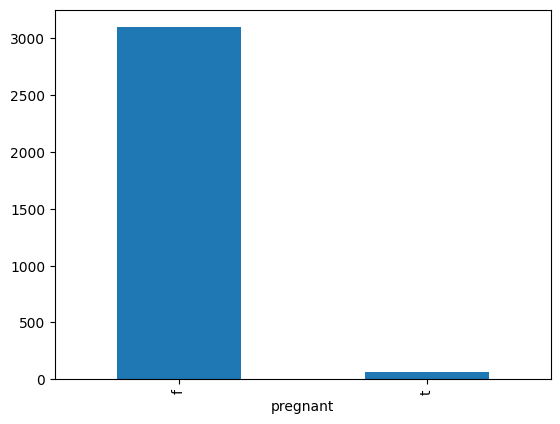

In [101]:
df['pregnant'].value_counts().plot(kind='bar')

<Axes: xlabel='tumor'>

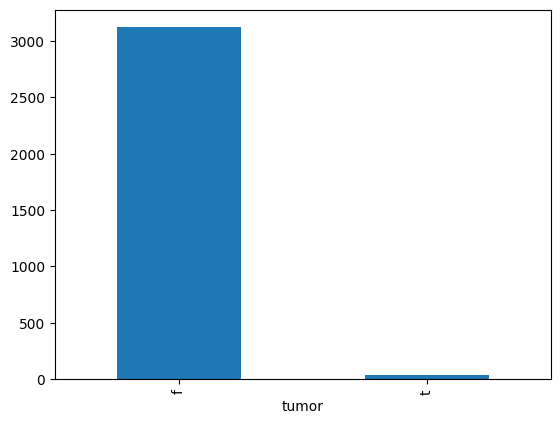

In [102]:
df['tumor'].value_counts().plot(kind='bar')

<Axes: xlabel='goitre'>

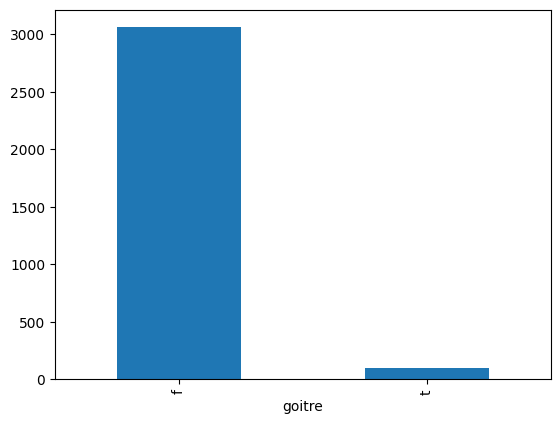

In [103]:
df['goitre'].value_counts().plot(kind='bar')

# Data Preprocessing

Data Cleaning

In [104]:
for column in df.columns:
    count=df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count()) 

age 446
sex 73
TSH 468
T3 695
TT4 249
T4U 248
FTI 247
TBG 2902


These are the values which have missing values but these are replaced with "?",now i will change all "?" with np.nan and after that deal with nan values

In [105]:
##replacing '?' with nan
df.replace('?',np.nan,inplace=True)

There are few columns which only indicating if next column has data on same position or not , so these type of columns
does not contribute in final outcome so i will drop them, but TBG is the binding protein which helps to pass the thyroid harmones such as T4(Thyroxine) to the other parts of the body , but here TBG column all values are missing so this column giving us no information so for this i have to drop it also.

In [106]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'Target'],
      dtype='object')

In [107]:
#droping this column because it has no significance in determinining final output
df = df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG'],axis =1)

In [108]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Target'],
      dtype='object')

Converting sex column to numeric by value mapping

In [109]:
df['sex']=df['sex'].map({'F':0,'M':1})

In [110]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Target
0,15,0.0,t,f,f,f,f,f,f,f,f,f,f,145,1.70,19,1.13,17,hypothyroid
1,24,1.0,f,f,f,f,f,f,f,f,f,f,f,0,0.20,4,1,0,hypothyroid
2,24,0.0,f,f,f,f,f,f,f,f,f,f,f,430,0.40,6,1.04,6,hypothyroid
3,77,1.0,f,f,f,f,f,f,f,f,f,f,f,7.30,1.20,57,1.28,44,hypothyroid
4,85,0.0,f,f,f,f,t,f,f,f,f,f,f,138,1.10,27,1.19,23,hypothyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,58,0.0,f,f,f,f,f,f,f,f,f,f,f,5.80,1.70,86,0.91,95,negative
3158,29,0.0,f,f,f,f,f,f,f,f,f,f,f,0.80,1.80,99,1.01,98,negative
3159,77,1.0,f,f,f,f,f,f,f,f,f,f,f,1.20,0.60,71,0.68,104,negative
3160,74,0.0,f,f,f,f,f,f,f,f,f,f,f,1.30,0.10,65,0.48,137,negative


#### Mapping Target Column

#converting target column to numeric 0 means absence of tyroid disease and 1 means presence of thyroid disease

In [111]:
df['Target']=df['Target'].map({'negative' : 0 ,'hypothyroid' : 1})

In [112]:
df['Target'].unique()

array([1, 0], dtype=int64)

#converting categorical columns to numerical 

In [113]:
cols_to_edit=['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery',
              'query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor']

In [114]:
for column in df[cols_to_edit]:
    if len(df[column].unique())==2:
        df[column]=df[column].map({'t':1,'f':0})
    else:
        pass

In [115]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Target
0,15,0.0,1,0,0,0,0,0,0,0,0,0,0,145,1.70,19,1.13,17,1
1,24,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.20,4,1,0,1
2,24,0.0,0,0,0,0,0,0,0,0,0,0,0,430,0.40,6,1.04,6,1
3,77,1.0,0,0,0,0,0,0,0,0,0,0,0,7.30,1.20,57,1.28,44,1
4,85,0.0,0,0,0,0,1,0,0,0,0,0,0,138,1.10,27,1.19,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,58,0.0,0,0,0,0,0,0,0,0,0,0,0,5.80,1.70,86,0.91,95,0
3158,29,0.0,0,0,0,0,0,0,0,0,0,0,0,0.80,1.80,99,1.01,98,0
3159,77,1.0,0,0,0,0,0,0,0,0,0,0,0,1.20,0.60,71,0.68,104,0
3160,74,0.0,0,0,0,0,0,0,0,0,0,0,0,1.30,0.10,65,0.48,137,0


In [116]:
df.isnull().sum()

age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH                          468
T3                           695
TT4                          249
T4U                          248
FTI                          247
Target                         0
dtype: int64

# Data Transformation

All the encoding for Categorical values is done. Imputing the missing values using Simple Imputer

In [117]:
df.dtypes

age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH                           object
T3                            object
TT4                           object
T4U                           object
FTI                           object
Target                         int64
dtype: object

In [118]:
# Create a SimpleImputer instance with 'mean' strategy
imputer = SimpleImputer(strategy='mean')
new_arr=imputer.fit_transform(df)#imputing missing values with KNN inputer
#converting new_arr to a new dataframe 'new_df'
new_df=pd.DataFrame(data=np.round(new_arr),columns=df.columns)

In [122]:
new_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Target                       0
dtype: int64

In [119]:
new_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Target
0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,2.0,19.0,1.0,17.0,1.0
1,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0
2,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,0.0,6.0,1.0,6.0,1.0
3,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,57.0,1.0,44.0,1.0
4,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,1.0,27.0,1.0,23.0,1.0


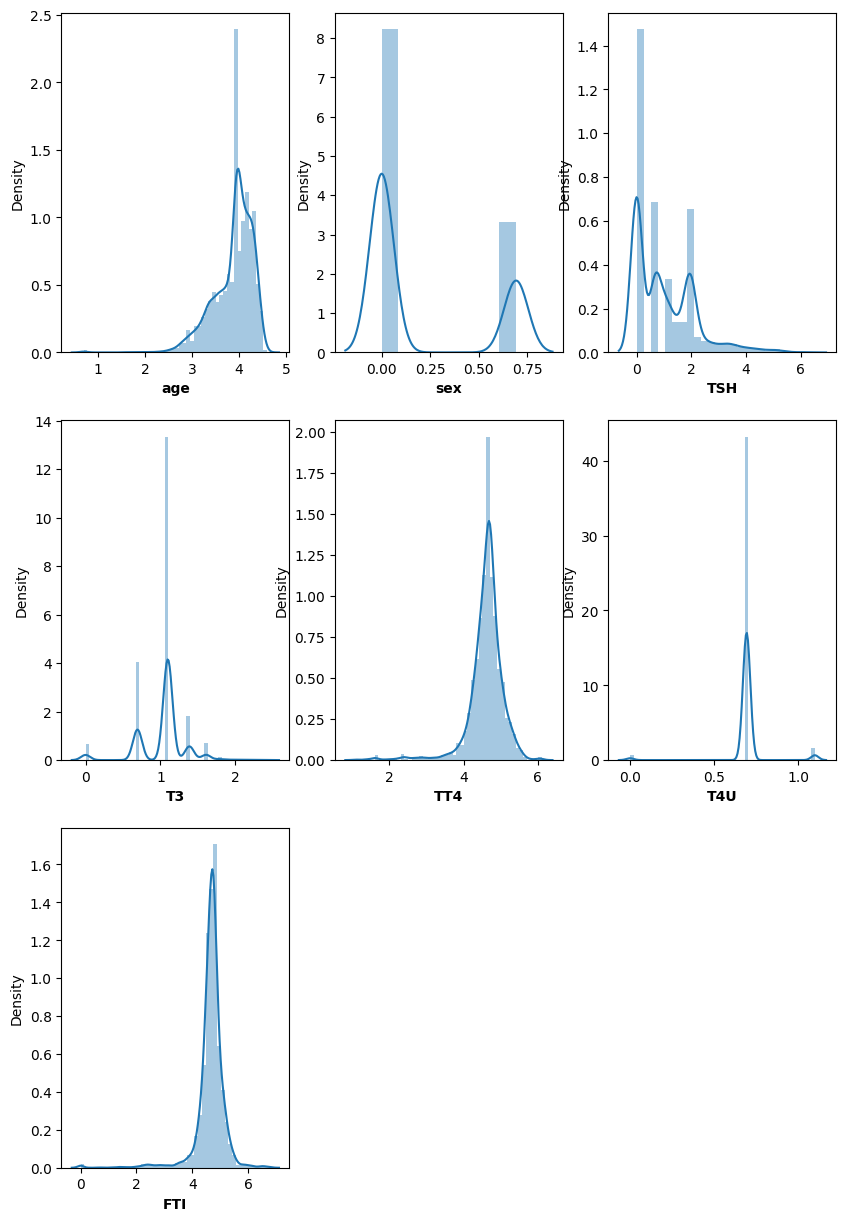

In [121]:
columns=['age','sex','TSH','T3','TT4','T4U','FTI']
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_df[column]+=1
    plt.subplot(3,3,plotnumber)
    sns.distplot(np.log(new_df[column]))
    plt.xlabel(column,fontsize=10,weight='bold')
    plotnumber+=1
plt.show()


After this i observed that all columns except TSH are looking fine. TSH has a weired trend , The primary function of TSH is to stimulate the thyroid gland to produce and release thyroxine (T4) and triiodothyronine (T3), which are the main thyroid hormones. TSH acts on the thyroid gland by binding to specific receptors, triggering the production and secretion of T4 and T3 into the bloodstream,dropping this column will be feasible because It won't give much of information so dropping this column.

In [123]:
new_df = new_df.drop('TSH',axis=1)

In [124]:
new_df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,T3,TT4,T4U,FTI,Target
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,52.125870,1.286844,0.145794,0.017394,0.013283,0.032891,0.076218,0.076850,0.019924,0.031309,0.012650,0.000633,0.031309,2.955408,109.891841,2.022454,116.400063,0.047438
std,17.881025,0.452360,0.352955,0.130755,0.114501,0.178378,0.265388,0.266396,0.139762,0.174180,0.111777,0.025146,0.174180,0.915733,43.631966,0.221728,57.817752,0.212608
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000
25%,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,86.000000,2.000000,93.000000,0.000000
50%,52.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,108.000000,2.000000,111.000000,0.000000
75%,65.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,125.000000,2.000000,127.000000,0.000000
max,99.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,451.000000,3.000000,882.000000,1.000000


# Checking Imbalanced data for target variable

In [125]:
new_df['Target'].value_counts()

Target
0.0    3012
1.0     150
Name: count, dtype: int64

By observing we clearly able to see that target varaible is highly imbalanced and we need to balance the target variable for 
accurate training of the model , so i used random over sampling for balancing this imbalanced target variable.

In [126]:
#dividing data in indipendent and dependent variable
x=new_df.drop('Target',axis=1)
y = new_df['Target']
rdsmple = RandomOverSampler()
x_sampled,y_sampled = rdsmple.fit_resample(x,y)

<Axes: xlabel='Target'>

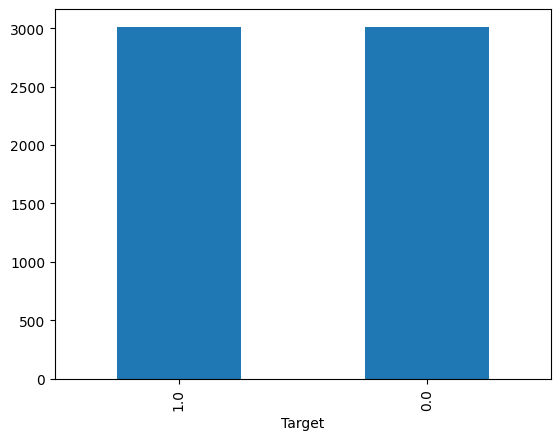

In [127]:
y_sampled.value_counts().plot(kind='bar')

Now the target variable is not imbalanced and we are ready to find corelations in the data

In [128]:
#combining the data
combined_data=pd.concat([x_sampled,y_sampled],axis=1)
combined_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,T3,TT4,T4U,FTI,Target
0,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0,2.0,18.0,1.0
1,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,1.0
2,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,2.0,7.0,1.0
3,78.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,58.0,2.0,45.0,1.0
4,86.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,28.0,2.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0,2.0,18.0,1.0
6020,72.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,2.0,51.0,1.0
6021,61.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,24.0,2.0,35.0,1.0
6022,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,2.0,9.0,1.0


<Axes: >

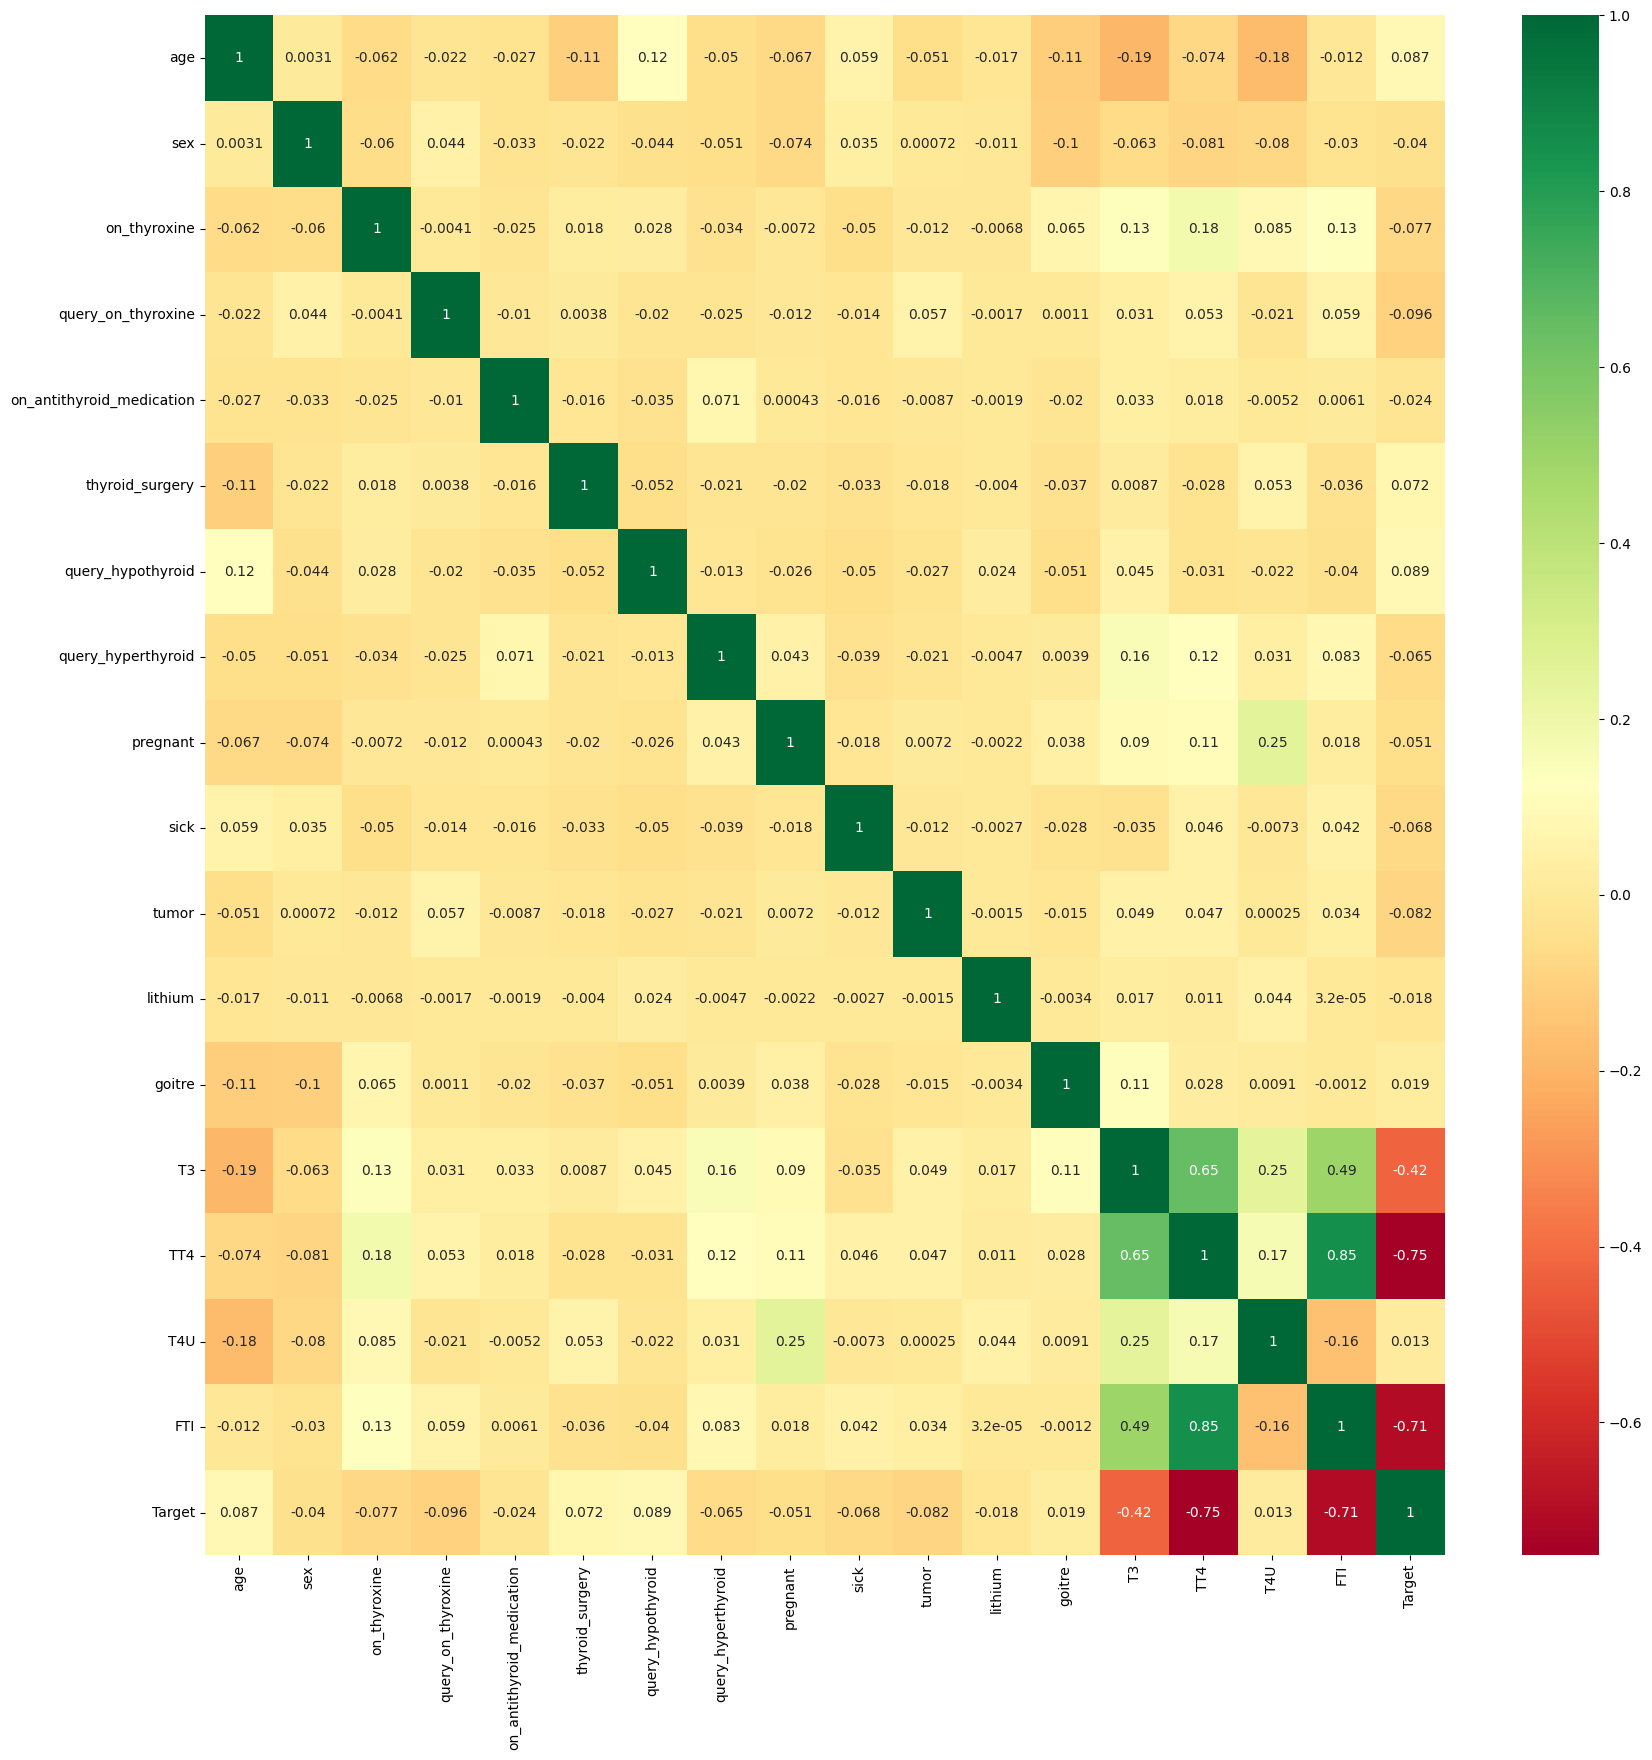

In [129]:
corrmat=combined_data.corr()
top_corr_fearures=corrmat.index
plt.figure(figsize=(20,20))
#plotting heatmap
sns.heatmap(combined_data[top_corr_fearures].corr(),annot=True,cmap="RdYlGn")

We can see target class is negatively corelated with TT4,T3 and FTI, and we can also see that TT4 and FTI are highly correlated.TT4,T3 and FTI are important features so we can't drop them , we should scale them and on high correlated features like FTI and T4U we can do nothing.

#Train-Test-Split

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=42)

In [131]:
x_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,T3,TT4,T4U,FTI
5887,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2.0,10.0
3813,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,51.0,2.0,56.0
3717,89.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,48.0,2.0,45.0
2754,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,78.0,1.0,194.0
2864,20.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,109.0,2.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,31.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,110.0,3.0,62.0
5191,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,56.0,2.0,62.0
5226,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0,2.0,18.0
5390,16.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,20.0,2.0,18.0


In [132]:
y_train

5887    1.0
3813    1.0
3717    1.0
2754    0.0
2864    0.0
       ... 
3772    1.0
5191    1.0
5226    1.0
5390    1.0
860     0.0
Name: Target, Length: 4819, dtype: float64

We devided our data in x_train and y_train for model training purpose , now we will do feature enginnering/selection and then we can train our model

# Feature Selection/Engineering

In [133]:
x_train.shape

(4819, 17)

we have 17 columns out of which we have to remove those columns which are not required and giving not enough information in training the model.

In [134]:
x_train.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,T3,TT4,T4U,FTI
count,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000
mean,53.468769,1.273916,0.118697,0.009338,0.010998,0.045238,0.100851,0.063499,0.015148,0.022619,0.007055,0.000208,0.034654,2.555094,74.398008,2.024486,77.244034
std,18.389709,0.446013,0.323465,0.096191,0.104305,0.207846,0.301162,0.243883,0.122156,0.148700,0.083708,0.014405,0.182922,1.058101,52.172831,0.197068,60.987585
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000
25%,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,34.000000,2.000000,35.000000
50%,52.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,69.000000,2.000000,68.000000
75%,67.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,110.000000,2.000000,114.000000
max,99.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,451.000000,3.000000,882.000000


We can clearly see that 'on_thyroxine','tumor','lithium' has standard deviation less than 0 means they are redundant data ,
but in this problem statement it contain important information , so i will not delete these columns.

### Scaling (Normalization)

In [135]:
train_scaler=MinMaxScaler()
test_scaler=MinMaxScaler()

scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data = train_scaler.transform(x_test)

# Model Training

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    LogisticRegression(max_iter=500): 'Logistic Regression',
    SVC(): "Support Vector Machine",
    RandomForestClassifier(): 'Random Forest',
    KNeighborsClassifier(n_neighbors=5): 'KNN',
    DecisionTreeClassifier(): 'Decision Tree'
}

def is_numpy_c_ordered(X):
    try:
        return X.flags.c_contiguous
    except AttributeError:
        return False

for m in models.keys():
    m.fit(x_train, y_train)

for model, name in models.items():
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score for {name} is: {acc_score * 100}%")


Accuracy Score for Logistic Regression is: 94.52282157676348%
Accuracy Score for Support Vector Machine is: 94.77178423236514%
Accuracy Score for Random Forest is: 99.25311203319502%
Accuracy Score for KNN is: 98.17427385892115%
Accuracy Score for Decision Tree is: 99.1701244813278%


# Classification Report for each model.

In [137]:
for model,name in models.items():
    y_pred = model.predict(x_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       614
         1.0       0.95      0.94      0.94       591

    accuracy                           0.95      1205
   macro avg       0.95      0.95      0.95      1205
weighted avg       0.95      0.95      0.95      1205

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       614
         1.0       0.94      0.95      0.95       591

    accuracy                           0.95      1205
   macro avg       0.95      0.95      0.95      1205
weighted avg       0.95      0.95      0.95      1205

----------------------------------------------------------
Classification 

In [138]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4819, 17), (4819,), (1205, 17), (1205,))

In [139]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9925311203319502

# Conclusion

Thyroid disease is one of the diseases that afflict the world’s population, and the number of cases of this disease is increasing. Because of medical reports that show serious imbalances in thyroid diseases, our study deals with the classification of thyroid disease hypothyroidism in a person or not. This disease was classified using algorithms. Machine learning showed us good results using several algorithms but i choosed Random Forest classifier for model training because it gives us high accuracy of 99 percent, which is best than other algorithm accuracy.